# MNIST

In [97]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images = x_train
labels = y_train

In [98]:
def reshape_MNIST(old_dataset):
    new_dataset = np.zeros((len(old_dataset),(28*28)))
    for i in range(len(old_dataset)):
        new_dataset[i] = np.zeros(28*28) #rows x columns of pixels in the dataset
        num = 0
        for j in range(len(old_dataset[i])):
            for l in range(len(old_dataset[i][j])):
                new_dataset[i] = old_dataset[i][j][l]
                num = num + 1
    return new_dataset

In [99]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (60000, 28, 28)
60000 train samples


# Outside of the Book

In [100]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

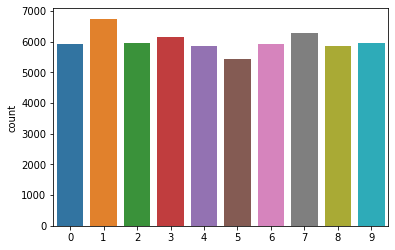

In [101]:
sns.countplot(labels)

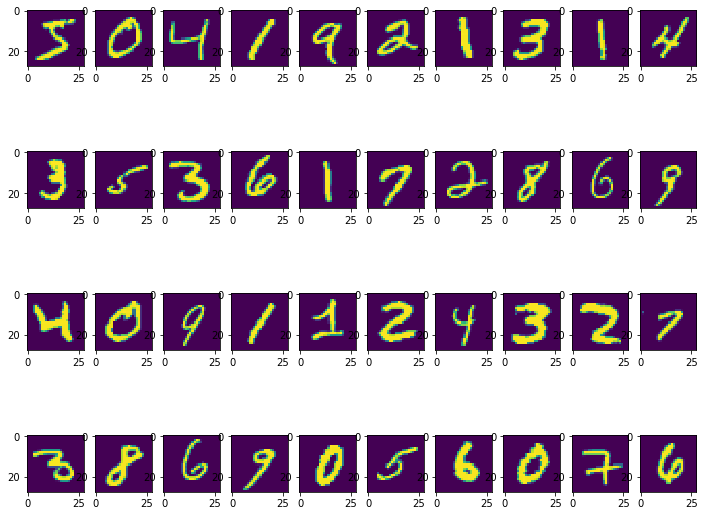

In [102]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

## normalizing the data

In [103]:
x_train = x_train/255.0
x_test = x_test/255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [77]:
x_train = reshape_MNIST(x_train)
x_test = reshape_MNIST(x_test)

In [104]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [105]:
print(x_train[:4])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [106]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

In [107]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [136]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [147]:
batch_size = 128
epochs = 5
input_shape = (28,28,1)

dropout = .5

In [148]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(dropout))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(dropout))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))


#model.add(Dense(784, activation = "relu", input_shape = input_shape))
#model.add(Dropout(dropout))
#model.add(Dense(392, activation = "relu"))
#model.add(Dropout(dropout))
#model.add(Dense(196, activation = "relu"))
#model.add(Dropout(dropout))
#model.add(Dense(98, activation = "relu"))
#model.add(Dropout(dropout))
#model.add(Dense(49, activation = "relu"))
#model.add(Dropout(dropout))
#model.add(BatchNormalization())
#model.add(Dense(num_classes, activation = "softmax"))

In [149]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
__________

In [152]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/5
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0906 - acc: 0.9729
Epoch 2/5
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0716 - acc: 0.9784
Epoch 3/5
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0611 - acc: 0.9814
Epoch 4/5
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0567 - acc: 0.9827
Epoch 5/5
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0504 - acc: 0.9851


In [153]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.025558, final accuracy: 0.992000


In [167]:
import os
# serialize model to YAML
os.chdir("./MNIST")
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
os.chdir("..")

Saved model to disk


In [ ]:
# load YAML and create model
os.chdir("./MNIST")
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
os.chdir("..")